In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%store -r df
df.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,day,year,str_month_no,start_hour,end_hour,duration_min,day_type,age,season,distance
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,...,Sun,2017,12,16,15,1335.166667,Weekend,30,Winter,0.944876
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,...,Sun,2017,12,15,13,1313.333333,Weekend,52,Winter,3.071144
4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,...,Sun,2017,12,14,2,726.716667,Weekend,20,Winter,0.637772


In [3]:
#Chekcing the number of rows and columns
df.shape

(1001173, 26)

In [4]:
# Data type information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1001173 entries, 0 to 179105
Data columns (total 26 columns):
duration_sec               1001173 non-null int64
start_time                 1001173 non-null datetime64[ns]
end_time                   1001173 non-null datetime64[ns]
start_station_id           1001173 non-null int64
start_station_name         1001173 non-null object
start_station_latitude     1001173 non-null float64
start_station_longitude    1001173 non-null float64
end_station_id             1001173 non-null int64
end_station_name           1001173 non-null object
end_station_latitude       1001173 non-null float64
end_station_longitude      1001173 non-null float64
bike_id                    1001173 non-null int64
user_type                  1001173 non-null object
member_birth_year          1001173 non-null float64
member_gender              1001173 non-null object
month                      1001173 non-null object
day                        1001173 non-null object
year

### 3. Time : 

**A) Compare the average number and average duration of trips made on each the days of the weeks.**


**To simplify the analysis- it is convenient to drop some of the columns that we do not need to explore the time variable.**

In [5]:
# Drop 13 columns that are not currently needed
df_time = df.drop(['duration_sec','start_time','end_time', 'start_station_id', 'start_station_name', 'start_station_latitude', 'start_station_longitude','end_station_id', 'end_station_name', 'end_station_latitude', 'end_station_longitude', 'bike_id','member_birth_year' ], axis=1)

In [6]:
# See the shape of the dataset- should return 13 columns 
df_time.shape

(1001173, 13)

In [7]:
#See the first 3 rows
df_time.head(3)

,user_type,member_gender,month,day,year,str_month_no,start_hour,end_hour,duration_min,day_type,age,season,distance
0,Customer,Male,Dec,Sun,2017,12,16,15,1335.166667,Weekend,30,Winter,0.944876
1,Customer,Female,Dec,Sun,2017,12,15,13,1313.333333,Weekend,52,Winter,3.071144
4,Subscriber,Female,Dec,Sun,2017,12,14,2,726.716667,Weekend,20,Winter,0.637772


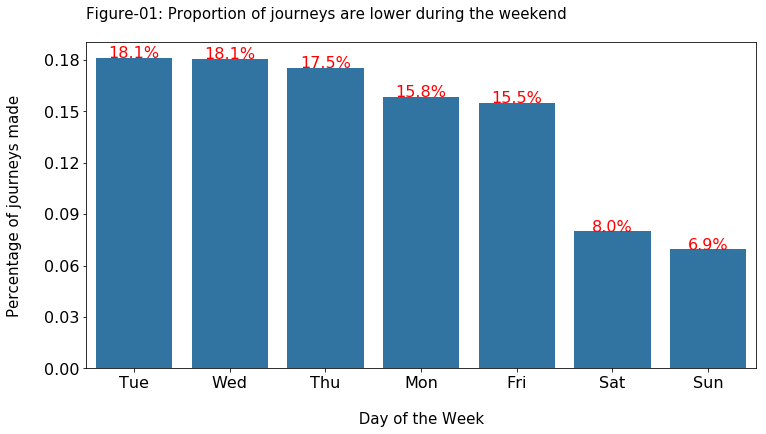

In [51]:
## Plot Proportion of journeys made per Day
plt.figure(figsize = [12, 6])
base_color = sns.color_palette()[1]
n_points = df_time['day'].value_counts().sum()
max_count = df_time['day'].value_counts().max()
max_prop = max_count/ n_points

# generate tick mark locations and names
tick_props = np.arange(0, max_prop, 0.03)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

# create the plot
base_color = sns.color_palette()[0]
sns.countplot(data = df_time, x = df_time['day'], color = base_color, order = df_time['day'].value_counts().index)
plt.yticks(tick_props * n_points, tick_names)
plt.xlabel("\n Day of the Week ",fontsize=15)
plt.ylabel("Percentage of journeys made\n",fontsize=15)
plt.title('Figure-01: Proportion of journeys are lower during the weekend \n',fontsize=15, loc="left")
plt.rc('xtick',labelsize=16)
plt.rc('ytick',labelsize=16)

# add annotations
cat_counts = df_time['day'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)
    plt.text(loc, count+1, pct_string, ha = 'center', color = 'R', fontsize=16)

In [9]:
avg_duration = df_time.groupby(['day']).mean().duration_min.reset_index().sort_values('duration_min', ascending=False)
avg_duration

,day,duration_min
2,Sat,16.361007
3,Sun,16.010844
0,Fri,12.324739
1,Mon,11.973838
4,Thu,11.878447
5,Tue,11.844706
6,Wed,11.794532


<Figure size 864x432 with 0 Axes>

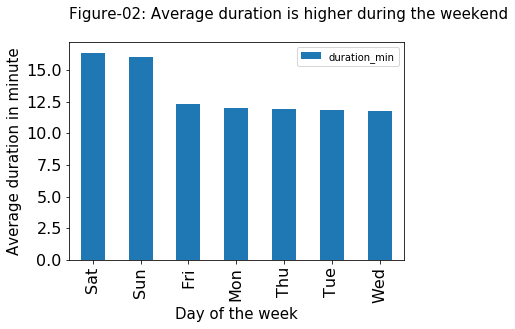

In [52]:
plt.figure(figsize =[12, 6])
sns.color_palette()
base_color = sns.color_palette()[0]
avg_duration.plot.bar(x='day', y='duration_min', color = base_color)
plt.xlabel("Day of the week", fontsize=15)
plt.ylabel("Average duration in minute",fontsize=15)
plt.title('Figure-02: Average duration is higher during the weekend\n',fontsize=15,loc="left")
plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)


**3-B) Show the percentage of journey taken during diffrent time of day, day of the week, month and Season of the year?**

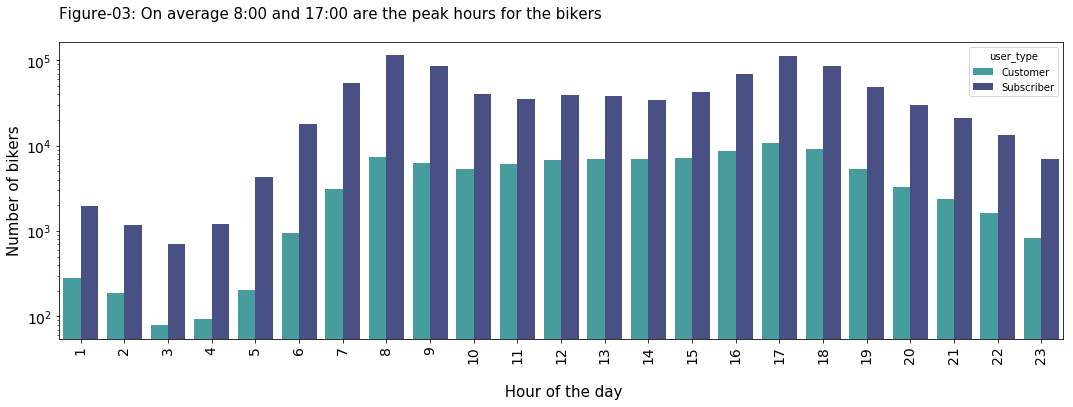

In [53]:
## Plot the percentage of movie released per quarter
plt.figure(figsize = [18, 12])
base_color = sns.color_palette()[0]
plt.subplot(2, 1, 1)
sns.countplot(data = df_time, x = 'start_hour', hue = 'user_type', palette = 'mako_r')
plt.xlabel("\n Hour of the day",fontsize=15)
plt.yscale('log')
plt.ylabel("Number of bikers",fontsize=15)
plt.title('Figure-03: On average 8:00 and 17:00 are the peak hours for the bikers\n',fontsize=15,loc="left")
plt.rc('xtick',labelsize=16)
plt.rc('ytick',labelsize=16)
plt.xticks(rotation=90);

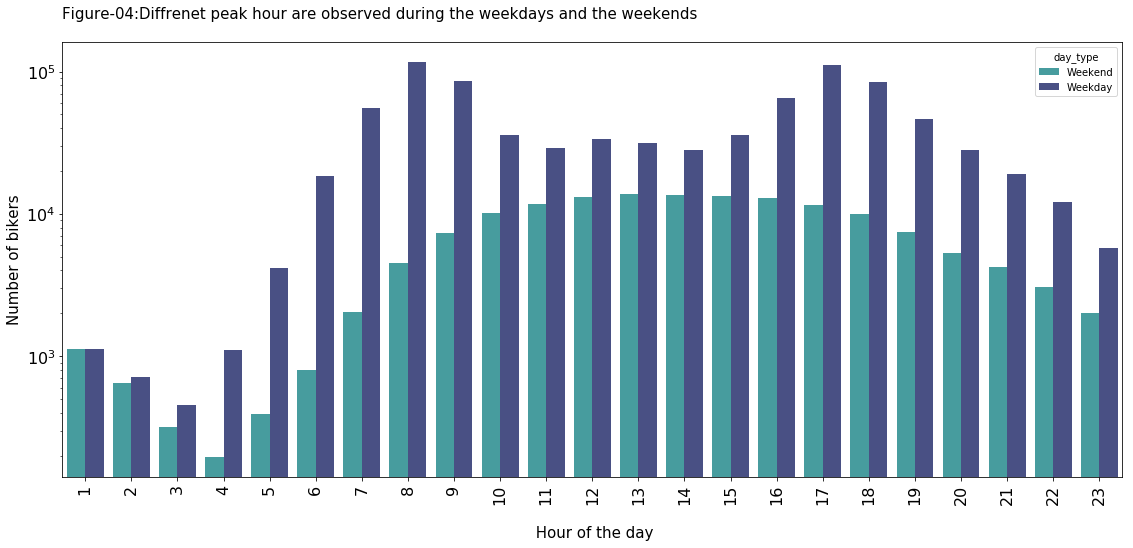

In [59]:
plt.figure(figsize = [19, 8])
sns.countplot(data = df_time, x = 'start_hour', hue = 'day_type', palette = 'mako_r')
plt.title('Figure-04:Diffrenet peak hour are observed during the weekdays and the weekends \n',fontsize=15,loc="left")
plt.xlabel("\n Hour of the day",fontsize=15)
plt.yscale('log')
plt.ylabel("Number of bikers",fontsize=15)
plt.rc('xtick',labelsize=16)
plt.rc('ytick',labelsize=16)
plt.xticks(rotation=90);


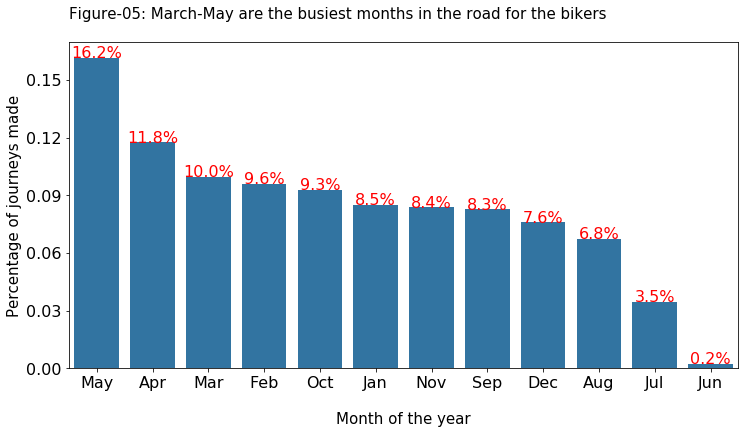

In [60]:
## Plot Proportion of journeys made per Day
plt.figure(figsize = [12, 6])
base_color = sns.color_palette()[1]
n_points = df_time['month'].value_counts().sum()
max_count = df_time['month'].value_counts().max()
max_prop = max_count/ n_points

# generate tick mark locations and names
tick_props = np.arange(0, max_prop, 0.03)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

# create the plot
base_color = sns.color_palette()[0]
sns.countplot(data = df_time, x = df_time['month'], color = base_color, order = df_time['month'].value_counts().index )
plt.yticks(tick_props * n_points, tick_names)
plt.xlabel(" \nMonth of the year",fontsize=15)
plt.ylabel("Percentage of journeys made",fontsize=15)
plt.title('Figure-05: March-May are the busiest months in the road for the bikers\n',fontsize=15,loc="left")
plt.rc('xtick',labelsize=16)
plt.rc('ytick',labelsize=16)

# add annotations
cat_counts = df_time['month'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)
    plt.text(loc, count+1, pct_string, ha = 'center', color = 'R', fontsize=16)

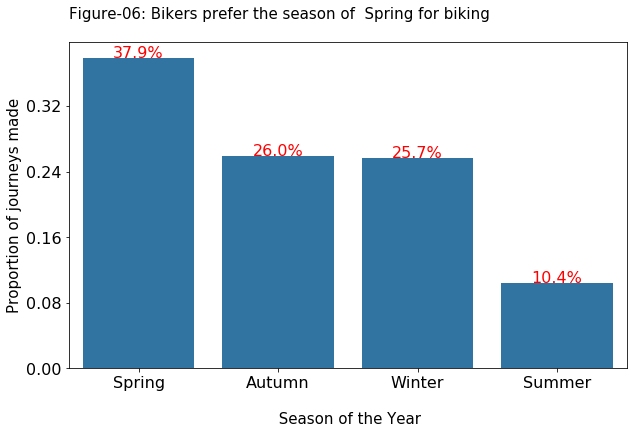

In [61]:
## Plot the percentage of movie released per quarter
plt.figure(figsize = [10, 6])
base_color = sns.color_palette()[1]
n_points = df_time['season'].value_counts().sum()
max_count = df_time['season'].value_counts().max()
max_prop = max_count/ n_points

# generate tick mark locations and names
tick_props = np.arange(0, max_prop, 0.08)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

# create the plot
base_color = sns.color_palette()[0]
sns.countplot(data = df_time, x = df_time['season'], color = base_color, order = df_time['season'].value_counts().index, )
plt.yticks(tick_props * n_points, tick_names)
plt.xlabel("\n Season of the Year",fontsize=15)
plt.ylabel("Proportion of journeys made",fontsize=15)
plt.title('Figure-06: Bikers prefer the season of  Spring for biking\n',fontsize=15,loc="left")
plt.rc('xtick',labelsize=16)
plt.rc('ytick',labelsize=16)

# add annotations
cat_counts = df_time['season'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)
    plt.text(loc, count+1, pct_string, ha = 'center', color = 'R', fontsize=16)

In [15]:
np.percentile(df_time.duration_min, 99.5)

101.74033333333404

In [16]:
df_time.duration_min.median()

9.0

In [17]:
df_time.duration_min.max()

1437.5333333333333

In [18]:
# Creates bin edges for duration of biking
bin_edges = [0,30, 60, 90, 120, 1437]
# Creates bin names based on the runtime
bin_names = ['1-30 min','31-60 min', '60-90 min', '90-120 min', '120-1437 min']

In [19]:
# Creates decade_levels column based on the year of release
df_time['dur_cat'] = pd.cut(df_time['duration_min'], bin_edges, labels = bin_names)
df_time.head()

,user_type,member_gender,month,day,year,str_month_no,start_hour,end_hour,duration_min,day_type,age,season,distance,dur_cat
0,Customer,Male,Dec,Sun,2017,12,16,15,1335.166667,Weekend,30,Winter,0.944876,120-1437 min
1,Customer,Female,Dec,Sun,2017,12,15,13,1313.333333,Weekend,52,Winter,3.071144,120-1437 min
4,Subscriber,Female,Dec,Sun,2017,12,14,2,726.716667,Weekend,20,Winter,0.637772,120-1437 min
28,Subscriber,Male,Dec,Sun,2017,12,23,23,14.516667,Weekend,38,Winter,0.623898,1-30 min
32,Subscriber,Female,Dec,Sun,2017,12,23,23,12.216667,Weekend,37,Winter,0.623898,1-30 min


In [20]:
df_time['dur_cat'].value_counts()

1-30 min        972995
31-60 min        19735
120-1437 min      4266
60-90 min         2766
90-120 min        1410
Name: dur_cat, dtype: int64

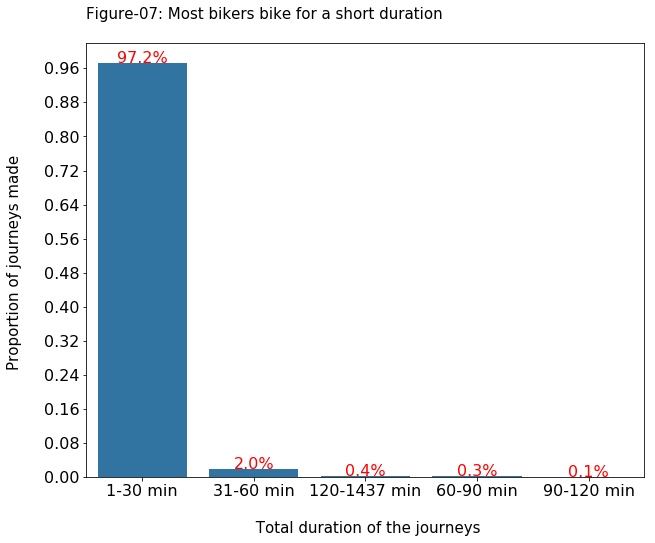

In [64]:
## Plot the percentage of movie released per quarter
plt.figure(figsize = [10, 8])
base_color = sns.color_palette()[1]
n_points = df_time['dur_cat'].value_counts().sum()
max_count = df_time['dur_cat'].value_counts().max()
max_prop = max_count/ n_points

# generate tick mark locations and names
tick_props = np.arange(0, max_prop, 0.08)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

# create the plot
base_color = sns.color_palette()[0]
sns.countplot(data = df_time, x = df_time['dur_cat'], color = base_color, order = df_time['dur_cat'].value_counts().index)
plt.yticks(tick_props * n_points, tick_names)
plt.xlabel("\n Total duration of the journeys",fontsize=15)
plt.ylabel("Proportion of journeys made \n",fontsize=15)
plt.title('Figure-07: Most bikers bike for a short duration \n',fontsize=15,loc="left")
plt.rc('xtick',labelsize=16)
plt.rc('ytick',labelsize=16)

# add annotations
cat_counts = df_time['dur_cat'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)
    plt.text(loc, count+1, pct_string, ha = 'center', color = 'R', fontsize=16)

In [57]:
np.percentile(df_time.duration_min, 75)

13.583333333333334

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


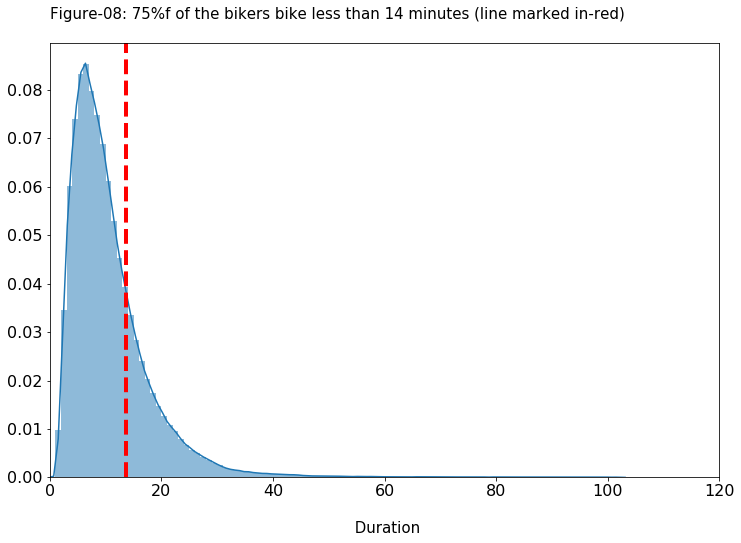

In [67]:
plt.figure(figsize = [12, 8])
df_duration_102 = df.query("duration_min<102")
bin_edges = np.arange(0, df_duration_102['duration_min'].max()+1, 1)
sns.distplot(df_duration_102['duration_min'], bins = bin_edges, kde = True,
            hist_kws = {'alpha' : 0.5})
plt.axvline(np.percentile(df_time.duration_min, 75), c = 'red', linestyle='dashed', linewidth=4)
plt.title('Figure-08: 75%f of the bikers bike less than 14 minutes (line marked in-red)\n',fontsize=15,loc="left")
plt.xlabel("\n Duration",fontsize=15)
plt.xlim(0, 120)
plt.rc('xtick',labelsize=16)
plt.rc('ytick',labelsize=16)

**Note:**

**1. Most Journeys are made during the middle of the week Tuesday- Thursday and the least during the weekend.**

**2. Average Distance covered during the weekend is almost similar to the weekdays although the number journeys are much higher during the weekdays.**

**3. Average durations of the journyes during the weekend is higher than the journys during the weekdays.**




### 4. User type 

**A) What is the percentage of Customer and subscriber?**
 
**B) Show the biking pattern of the Customer and subscriber during the various hours of the day.**



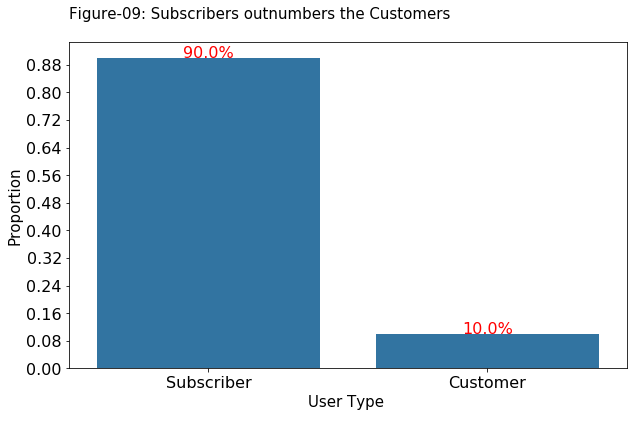

In [68]:
# code for the pie chart seen above
## Plot the percentage of movie released per quarter
plt.figure(figsize = [10, 6])
base_color = sns.color_palette()[1]
n_points = df['user_type'].value_counts().sum()
max_count = df['user_type'].value_counts().max()
max_prop = max_count/ n_points

# generate tick mark locations and names
tick_props = np.arange(0, max_prop, 0.08)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

# create the plot
base_color = sns.color_palette()[0]
sns.countplot(data = df, x = df['user_type'], color = base_color, order = df['user_type'].value_counts().index )
plt.yticks(tick_props * n_points, tick_names)
plt.xlabel("User Type \n",fontsize=15)
plt.ylabel("Proportion",fontsize=15)
plt.title('Figure-09: Subscribers outnumbers the Customers \n',fontsize=15,loc="left")
plt.rc('xtick',labelsize=16)
plt.rc('ytick',labelsize=16)

# add annotations
cat_counts = df['user_type'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)
    plt.text(loc, count+1, pct_string, ha = 'center', color = 'R', fontsize=16)

In [24]:
df_subscriber = df_time.query('user_type == "Subscriber"')
df_customer = df_time.query('user_type == "Customer"')

Text(0,1,'Figure-10: Distribution of start hour for the subscribers and the customers throughout the day \n')

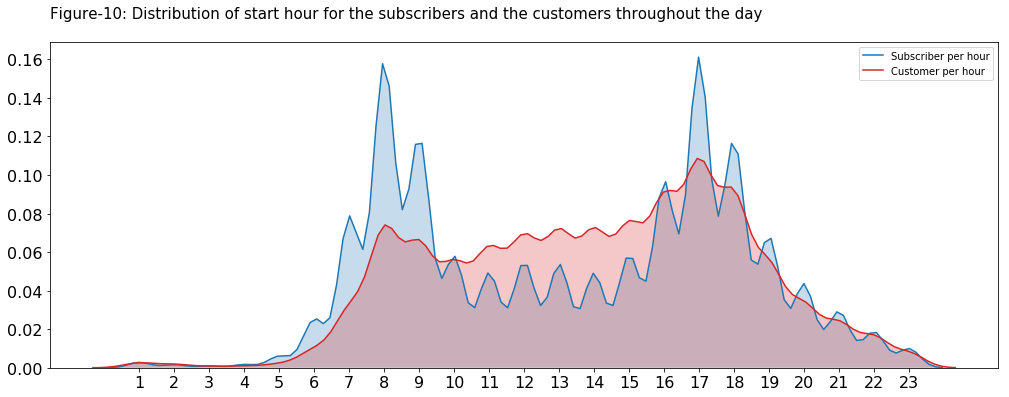

In [69]:
fig = plt.figure(figsize = [17, 6])
sns.kdeplot(df_subscriber['start_hour'],shade=True, color = sns.color_palette()[0], label='Subscriber per hour')
plt.xticks(np.arange(min(df_subscriber['start_hour']), max(df_subscriber['start_hour'])+1, 1.0))

sns.kdeplot(df_customer['start_hour'],shade=True,color = sns.color_palette()[3],label='Customer per hour')
plt.title('Figure-10: Distribution of start hour for the subscribers and the customers throughout the day \n',fontsize=15,loc="left")



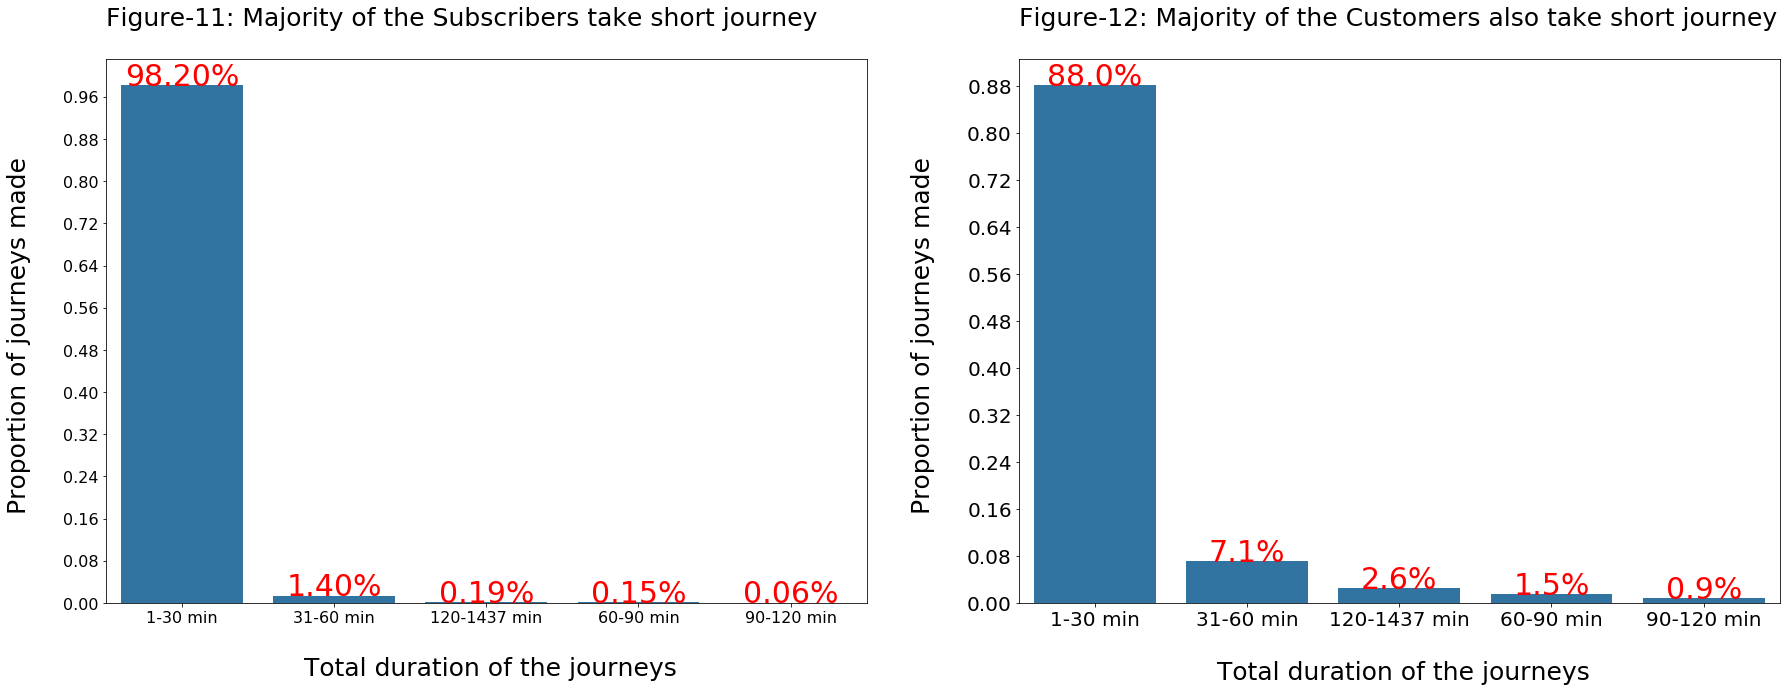

In [70]:
## Plot the percentage of movie released per quarter
plt.figure(figsize = [30, 10])
plt.subplot(1,2, 1)
base_color = sns.color_palette()[1]
n_points = df_subscriber['dur_cat'].value_counts().sum()
max_count = df_subscriber['dur_cat'].value_counts().max()
max_prop = max_count/ n_points

# generate tick mark locations and names
tick_props = np.arange(0, max_prop, 0.08)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

# create the plot
base_color = sns.color_palette()[0]
sns.countplot(data = df_time, x = df_subscriber['dur_cat'], color = base_color, order = df_subscriber['dur_cat'].value_counts().index )
plt.yticks(tick_props * n_points, tick_names)
plt.xlabel("\n Total duration of the journeys",fontsize=25)
plt.ylabel("Proportion of journeys made \n",fontsize=25)
plt.title('Figure-11: Majority of the Subscribers take short journey \n',fontsize=25,loc="left")
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)



# add annotations
cat_counts = df_subscriber['dur_cat'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.2f}%'.format(100*count/n_points)
    plt.text(loc, count+1, pct_string, ha = 'center', color = 'R', fontsize=30)
    

plt.subplot(1,2, 2)
base_color = sns.color_palette()[1]
n_points = df_customer['dur_cat'].value_counts().sum()
max_count = df_customer['dur_cat'].value_counts().max()
max_prop = max_count/ n_points

# generate tick mark locations and names
tick_props = np.arange(0, max_prop, 0.08)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

# create the plot
base_color = sns.color_palette()[0]
sns.countplot(data = df_time, x = df_customer['dur_cat'], color = base_color, order = df_customer['dur_cat'].value_counts().index )
plt.yticks(tick_props * n_points, tick_names)
plt.xlabel("\n Total duration of the journeys",fontsize=25)
plt.ylabel("Proportion of journeys made \n",fontsize=25)
plt.title('Figure-12: Majority of the Customers also take short journey \n',fontsize=25,loc="left")
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)

# add annotations
cat_counts = df_customer['dur_cat'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)
    plt.text(loc, count+1, pct_string, ha = 'center', color = 'R', fontsize=30)

## Distance and Duration by Customers and Subscribers

In [27]:
# Function to find outliers from 25 and 75 percetile values
def find_outliers (df_column):
    
    # input: column of a dataframe
    # outpuer:  lower_limit, upper_limit of the dataframe- outlier values
    
    first_quartile = np.percentile(df_column, 25)
    
    third_quartile = np.percentile(df_column, 75)
    
    IQR = third_quartile-first_quartile
    
    upper_limit = third_quartile + 1.5*IQR
    
    lower_limit = first_quartile -1.5*IQR
    
    return  upper_limit

In [28]:
# Finding the distance in kilometer that would be considered outliers
duration_outlier = find_outliers(df['distance'])
duration_outlier

3.818133903462475

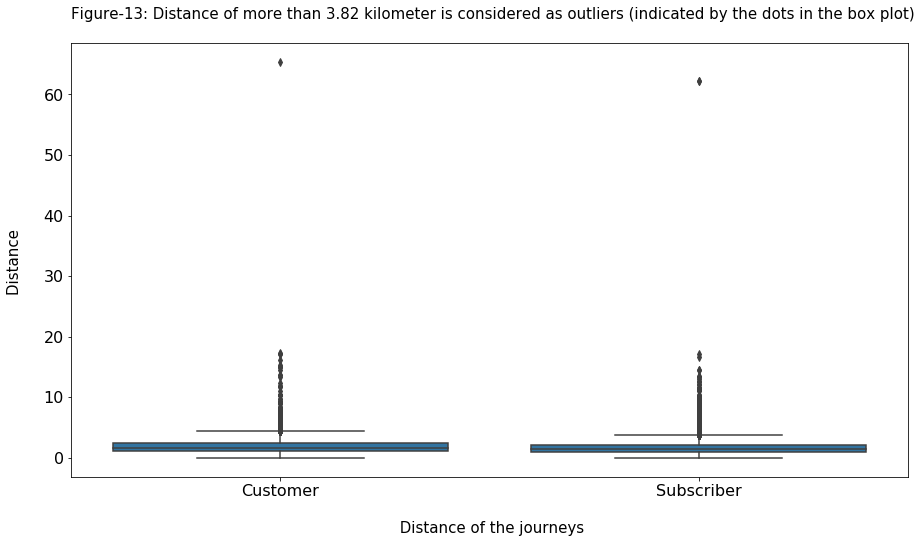

In [72]:
plt.figure(figsize = [15, 8])
base_color = sns.color_palette()[0]
# left plot: violin plot
sns.boxplot(data = df, x = 'user_type', y = 'distance', color = base_color)
plt.xlabel("\n Distance of the journeys",fontsize=15)
plt.ylabel("Distance \n",fontsize=15)
plt.title('Figure-13: Distance of more than 3.82 kilometer is considered as outliers (indicated by the dots in the box plot)\n',fontsize=15,loc="left")
plt.rc('xtick',labelsize=16)
plt.rc('ytick',labelsize=16)


In [30]:
#Finding the minimum and the maximum distance by the customer
df_customer['distance'].min(),df_customer['distance'].max()

(0.02200283346585486, 65.30812497282311)

In [31]:
#Finding the minimum and the maximum distance by the subscriber
df_subscriber['distance'].min(),df_subscriber['distance'].max()

(0.013307063673057916, 62.24598393668967)

In [32]:
# median distance of the customers 
df_customer['distance'].median()

1.6773062911317969

In [33]:
# median distance of the customers 
df_subscriber['distance'].median()

1.3902440262661981

In [34]:
# Calculaitng 99.99% percentile
ninetynine_percentile_distance_customer = np.percentile(df_customer.distance, 99)
ninetynine_percentile_distance_subscriber = np.percentile(df_subscriber.distance, 99)
ninetynine_percentile_distance_customer, ninetynine_percentile_distance_subscriber

(5.0699060610514906, 4.670497675815256)

In [35]:
df_customer_majority_distance = df_customer.query('distance < 5.1') 
df_subscriber_majority_distance = df_subscriber.query('distance < 4.8') 

In [36]:
df_customer.describe().distance

count    99950.000000
mean         1.906899
std          1.094007
min          0.022003
25%          1.116384
50%          1.677306
75%          2.456319
max         65.308125
Name: distance, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


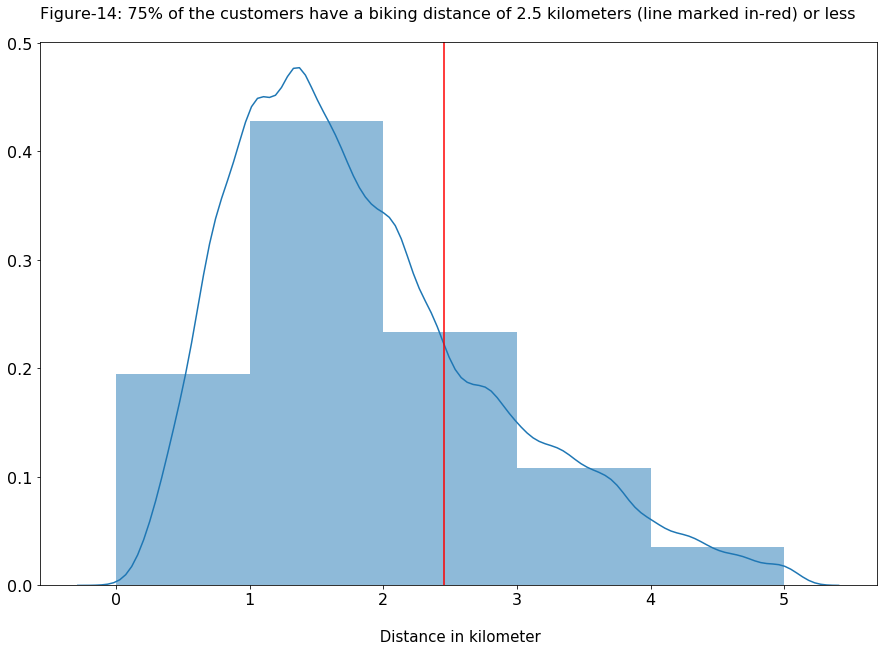

In [87]:
plt.figure(figsize = [15, 10])
bin_edges = np.arange(0, df_customer_majority_distance.distance.max(), 1)
sns.distplot(df_customer_majority_distance['distance'], bins = bin_edges, kde = True,
            hist_kws = {'alpha' : 0.5})
plt.axvline(np.percentile(df_customer.distance, 75), c = 'red')
plt.xlabel("\n Distance in kilometer",fontsize=15)
plt.title('Figure-14: 75% of the customers have a biking distance of 2.5 kilometers (line marked in-red) or less \n',fontsize=16,loc="left")
plt.rc('xtick',labelsize=16)
plt.rc('ytick',labelsize=16)

In [43]:
# Finding the distance in kilometer that would be considered outliers
duration_outlier_customers = find_outliers(df_customer['distance'])
duration_outlier_customers

4.466219559895201

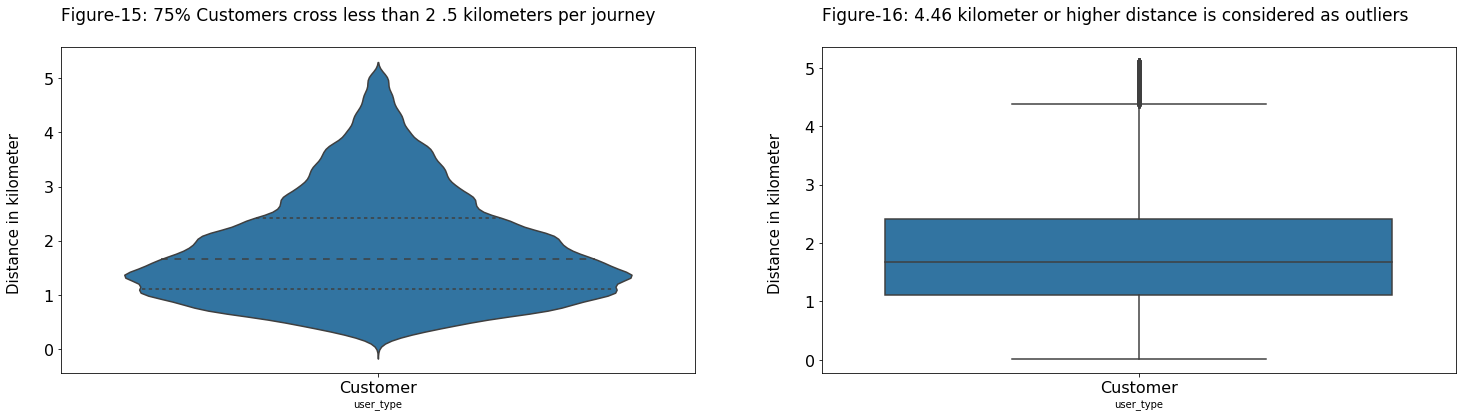

In [80]:
plt.figure(figsize = [25, 6])

# left plot: violin plot
base_color = sns.color_palette()[0]
plt.subplot(1, 2, 1)
sns.violinplot(data = df_customer_majority_distance, x = 'user_type', y = 'distance', color = base_color, inner='quartile')
plt.title('Figure-15: 75% Customers cross less than 2 .5 kilometers per journey \n',fontsize=17,loc="left")
plt.ylabel("Distance in kilometer \n",fontsize=15)
plt.rc('xtick',labelsize=16)
plt.rc('ytick',labelsize=16)

plt.subplot(1, 2, 2)
sns.boxplot(data = df_customer_majority_distance, x = 'user_type', y = 'distance', color = base_color)
plt.title('Figure-16: 4.46 kilometer or higher distance is considered as outliers\n',fontsize=17,loc="left")
plt.ylabel("Distance in kilometer \n",fontsize=15)
plt.rc('xtick',labelsize=16)
plt.rc('ytick',labelsize=16)


In [45]:
df_subscriber.describe().distance

count    901223.000000
mean          1.602259
std           0.961826
min           0.013307
25%           0.917098
50%           1.390244
75%           2.056916
max          62.245984
Name: distance, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


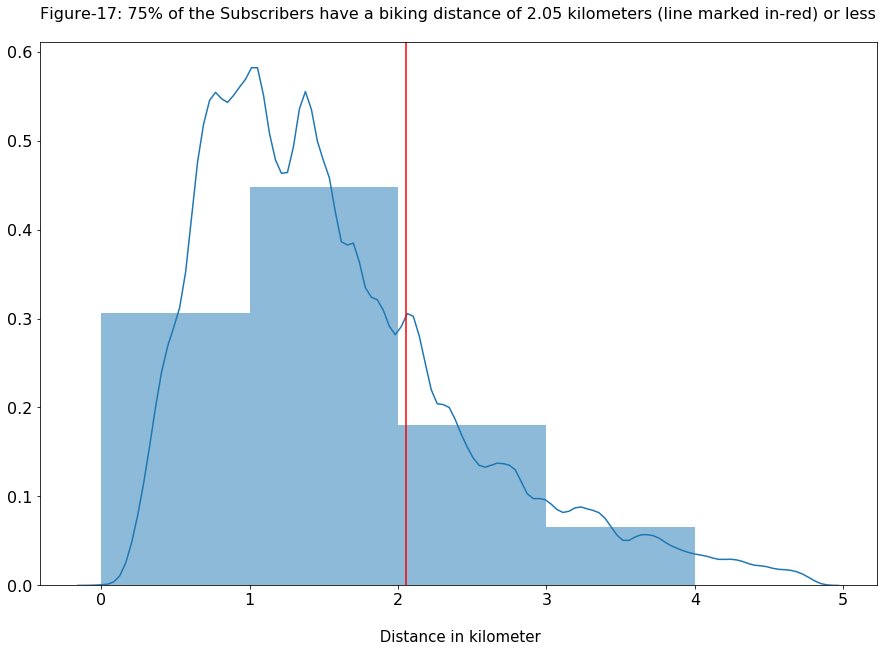

In [92]:
plt.figure(figsize = [15, 10])
bin_edges = np.arange(0, df_subscriber_majority_distance.distance.max(), 1)
sns.distplot(df_subscriber_majority_distance['distance'], bins = bin_edges, kde = True,
            hist_kws = {'alpha' : 0.5})
plt.axvline(np.percentile(df_subscriber.distance, 75), c = 'red')
plt.xlabel("\n Distance in kilometer",fontsize=15)
plt.title('Figure-17: 75% of the Subscribers have a biking distance of 2.05 kilometers (line marked in-red) or less \n',fontsize=16,loc="left")
plt.rc('xtick',labelsize=16)
plt.rc('ytick',labelsize=16)

In [83]:
# Finding the time that would be considered outliers for runtime
distance_outliers = find_outliers(df_subscriber['distance'])
distance_outliers 

3.76664272486119

Text(0,0.5,'Distance in kilometer \n')

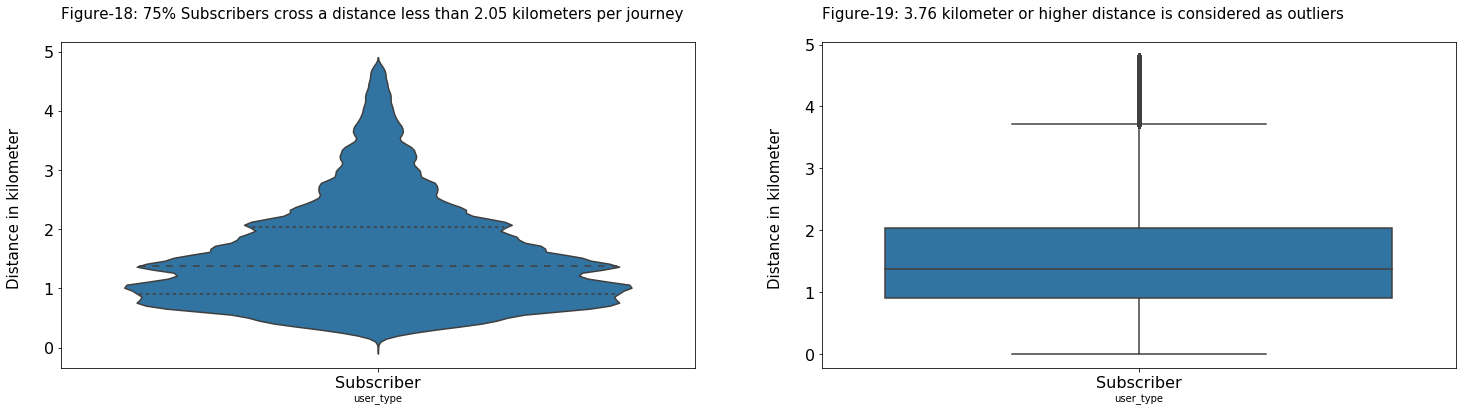

In [91]:
plt.figure(figsize = [25, 6])

plt.subplot(1, 2, 1)
sns.violinplot(data = df_subscriber_majority_distance, x = 'user_type', y = 'distance', color = base_color,inner='quartile')
plt.title('Figure-18: 75% Subscribers cross a distance less than 2.05 kilometers per journey \n',fontsize=15,loc="left")
plt.rc('xtick',labelsize=16)
plt.rc('ytick',labelsize=16)
plt.ylabel("Distance in kilometer \n",fontsize=15)

plt.subplot(1, 2, 2)
sns.boxplot(data = df_subscriber_majority_distance, x = 'user_type', y = 'distance', color = base_color)
plt.title('Figure-19: 3.76 kilometer or higher distance is considered as outliers \n',fontsize=15,loc="left")
plt.rc('xtick',labelsize=16)
plt.rc('ytick',labelsize=16)
plt.ylabel("Distance in kilometer \n",fontsize=15)


In [123]:
duration_count = df.groupby(['user_type', 'day_type']).mean().duration_min
duration_count = duration_count.reset_index(name = 'duration')
duration_count

,user_type,day_type,duration
0,Customer,Weekday,25.291333
1,Customer,Weekend,31.129321
2,Subscriber,Weekday,10.789164
3,Subscriber,Weekend,12.192365


In [124]:
distance_count = df.groupby(['user_type', 'day_type']).mean().distance
distance_count = distance_count.reset_index(name = 'distance')
distance_count 

,user_type,day_type,distance
0,Customer,Weekday,1.927758
1,Customer,Weekend,1.861839
2,Subscriber,Weekday,1.610283
3,Subscriber,Weekend,1.548939


In [136]:
df_distance_duration = pd.merge(duration_count, distance_count)
df_distance_duration

,user_type,day_type,duration,distance
0,Customer,Weekday,25.291333,1.927758
1,Customer,Weekend,31.129321,1.861839
2,Subscriber,Weekday,10.789164,1.610283
3,Subscriber,Weekend,12.192365,1.548939


In [50]:
# Store the dataset
%store df_time
%store df_customer
%store df_subscriber

Stored 'df_time' (DataFrame)
Stored 'df_customer' (DataFrame)
Stored 'df_subscriber' (DataFrame)
